In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LSQUnivariateSpline, BSpline

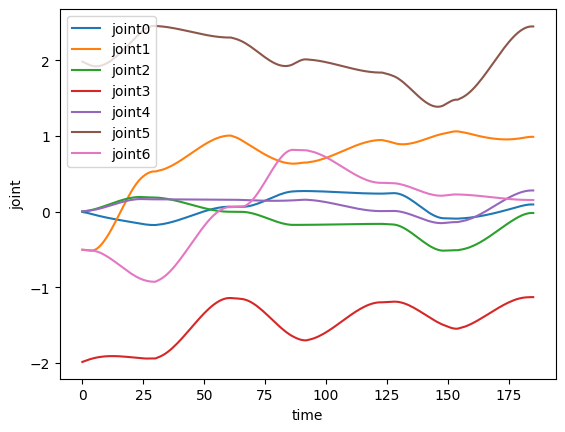

In [117]:
actions = np.load("./bridge_data/1/actions.npy")
for i in range(7):
    x = list(range(len(actions)))
    y = actions[:, i]
    plt.plot(x, y, label=f"joint{i}")
plt.xlabel("time")
plt.ylabel("joint")
plt.legend()
plt.show()

186


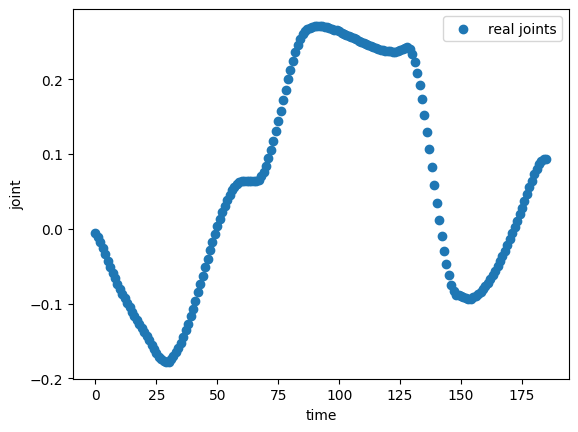

In [118]:
step_size = 1
y = np.array(actions[::step_size, 0])
x = np.array(list(range(len(y))))
print(len(y))
plt.scatter(x, y, label=f"real joints")
plt.xlabel("time")
plt.ylabel("joint")
plt.legend()
plt.show()

[-0.18391804  0.05037019  0.27672392 -0.12859966]
[0, 0, 0, 93, 185, 185, 185]


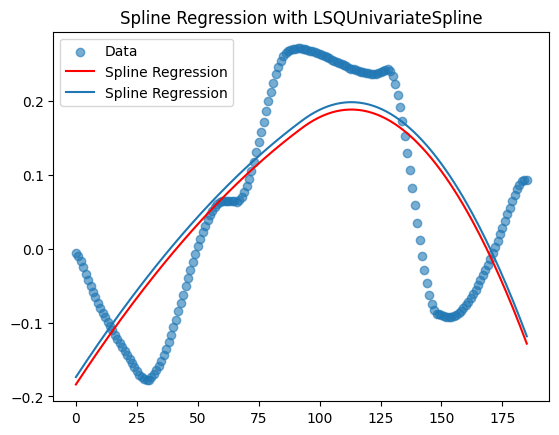

In [119]:
# Define knots for the spline
degree = 2
knots = [int(len(y)*.5)]
coeffs = [0.03053969, -0.51042231, 0.98116565, -0.31500108, 0.09951408]

# Perform spline regression
spline = LSQUnivariateSpline(x, y, t=knots, k=degree)  # k=3 for cubic spline

# Generate predictions
x_pred = np.linspace(0, len(y)-1, 200)
y_pred = spline(x_pred)

# Retrieve coefficients and knots
coeffs = spline.get_coeffs()

knots_full = [0] * (degree + 1) + knots + [len(y)-1] * (degree + 1)
print(coeffs)
print(knots_full)
spline1 = BSpline(knots_full, coeffs, degree)
y_pred1 = spline1(x_pred) +.01

# Plot
plt.scatter(x, y, label="Data", alpha=0.6)
plt.plot(x_pred, y_pred, label="Spline Regression", color="red")
plt.plot(x_pred, y_pred1, label="Spline Regression")
plt.legend()
plt.title("Spline Regression with LSQUnivariateSpline")
plt.show()

/var/folders/3s/hzwnx0js65nd8l8bktfqjfxw0000gn/T/ipykernel_17925/1625595211.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


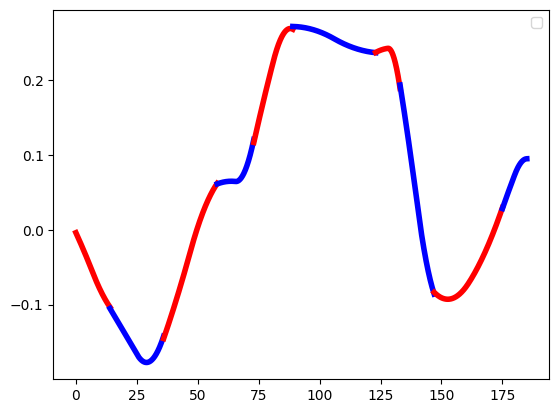

In [180]:
degree = 2

splines = []

spline_start_idx = 0
spline_end_idx = len(y)-1

# plt.scatter(x, y, label="Data", alpha=0.6)

max_cost = .01

while True:
    
    while spline_end_idx - spline_start_idx > 4:

        knot = ((spline_end_idx - spline_start_idx) * .5) + spline_start_idx
        knots = [knot]
        x_slice = x[spline_start_idx:spline_end_idx]
        y_slice = y[spline_start_idx:spline_end_idx]
        spline = LSQUnivariateSpline(x_slice, y_slice, t=knots, k=degree)

        cost = np.sum(np.abs(spline(x_slice)-y_slice))
        if cost < max_cost:
            break

        spline_end_idx -= 1

    coeffs = spline.get_coeffs()
    splines.append([*coeffs, knot])

    x_pred = np.linspace(spline_start_idx, spline_end_idx, 200)
    y_pred = spline(x_pred)
    if len(splines) % 2:
        plt.plot(x_pred, y_pred, color="red", linewidth=4)
    else:
        plt.plot(x_pred, y_pred, color="blue", linewidth=4)
    
    if spline_end_idx == len(y)-1:
        break

    # print(spline_start_idx, spline_end_idx)
    # print(knot)
    spline_start_idx = spline_end_idx
    spline_end_idx = len(y)-1

plt.legend()
plt.show()